<a href="https://colab.research.google.com/github/MansiKaushik123/Netflix_Movies/blob/main/Netflix_Movies_%26_TV_shows_Clustering_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV shows Clustering -Unsupervised Learning



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Mansi Kaushik



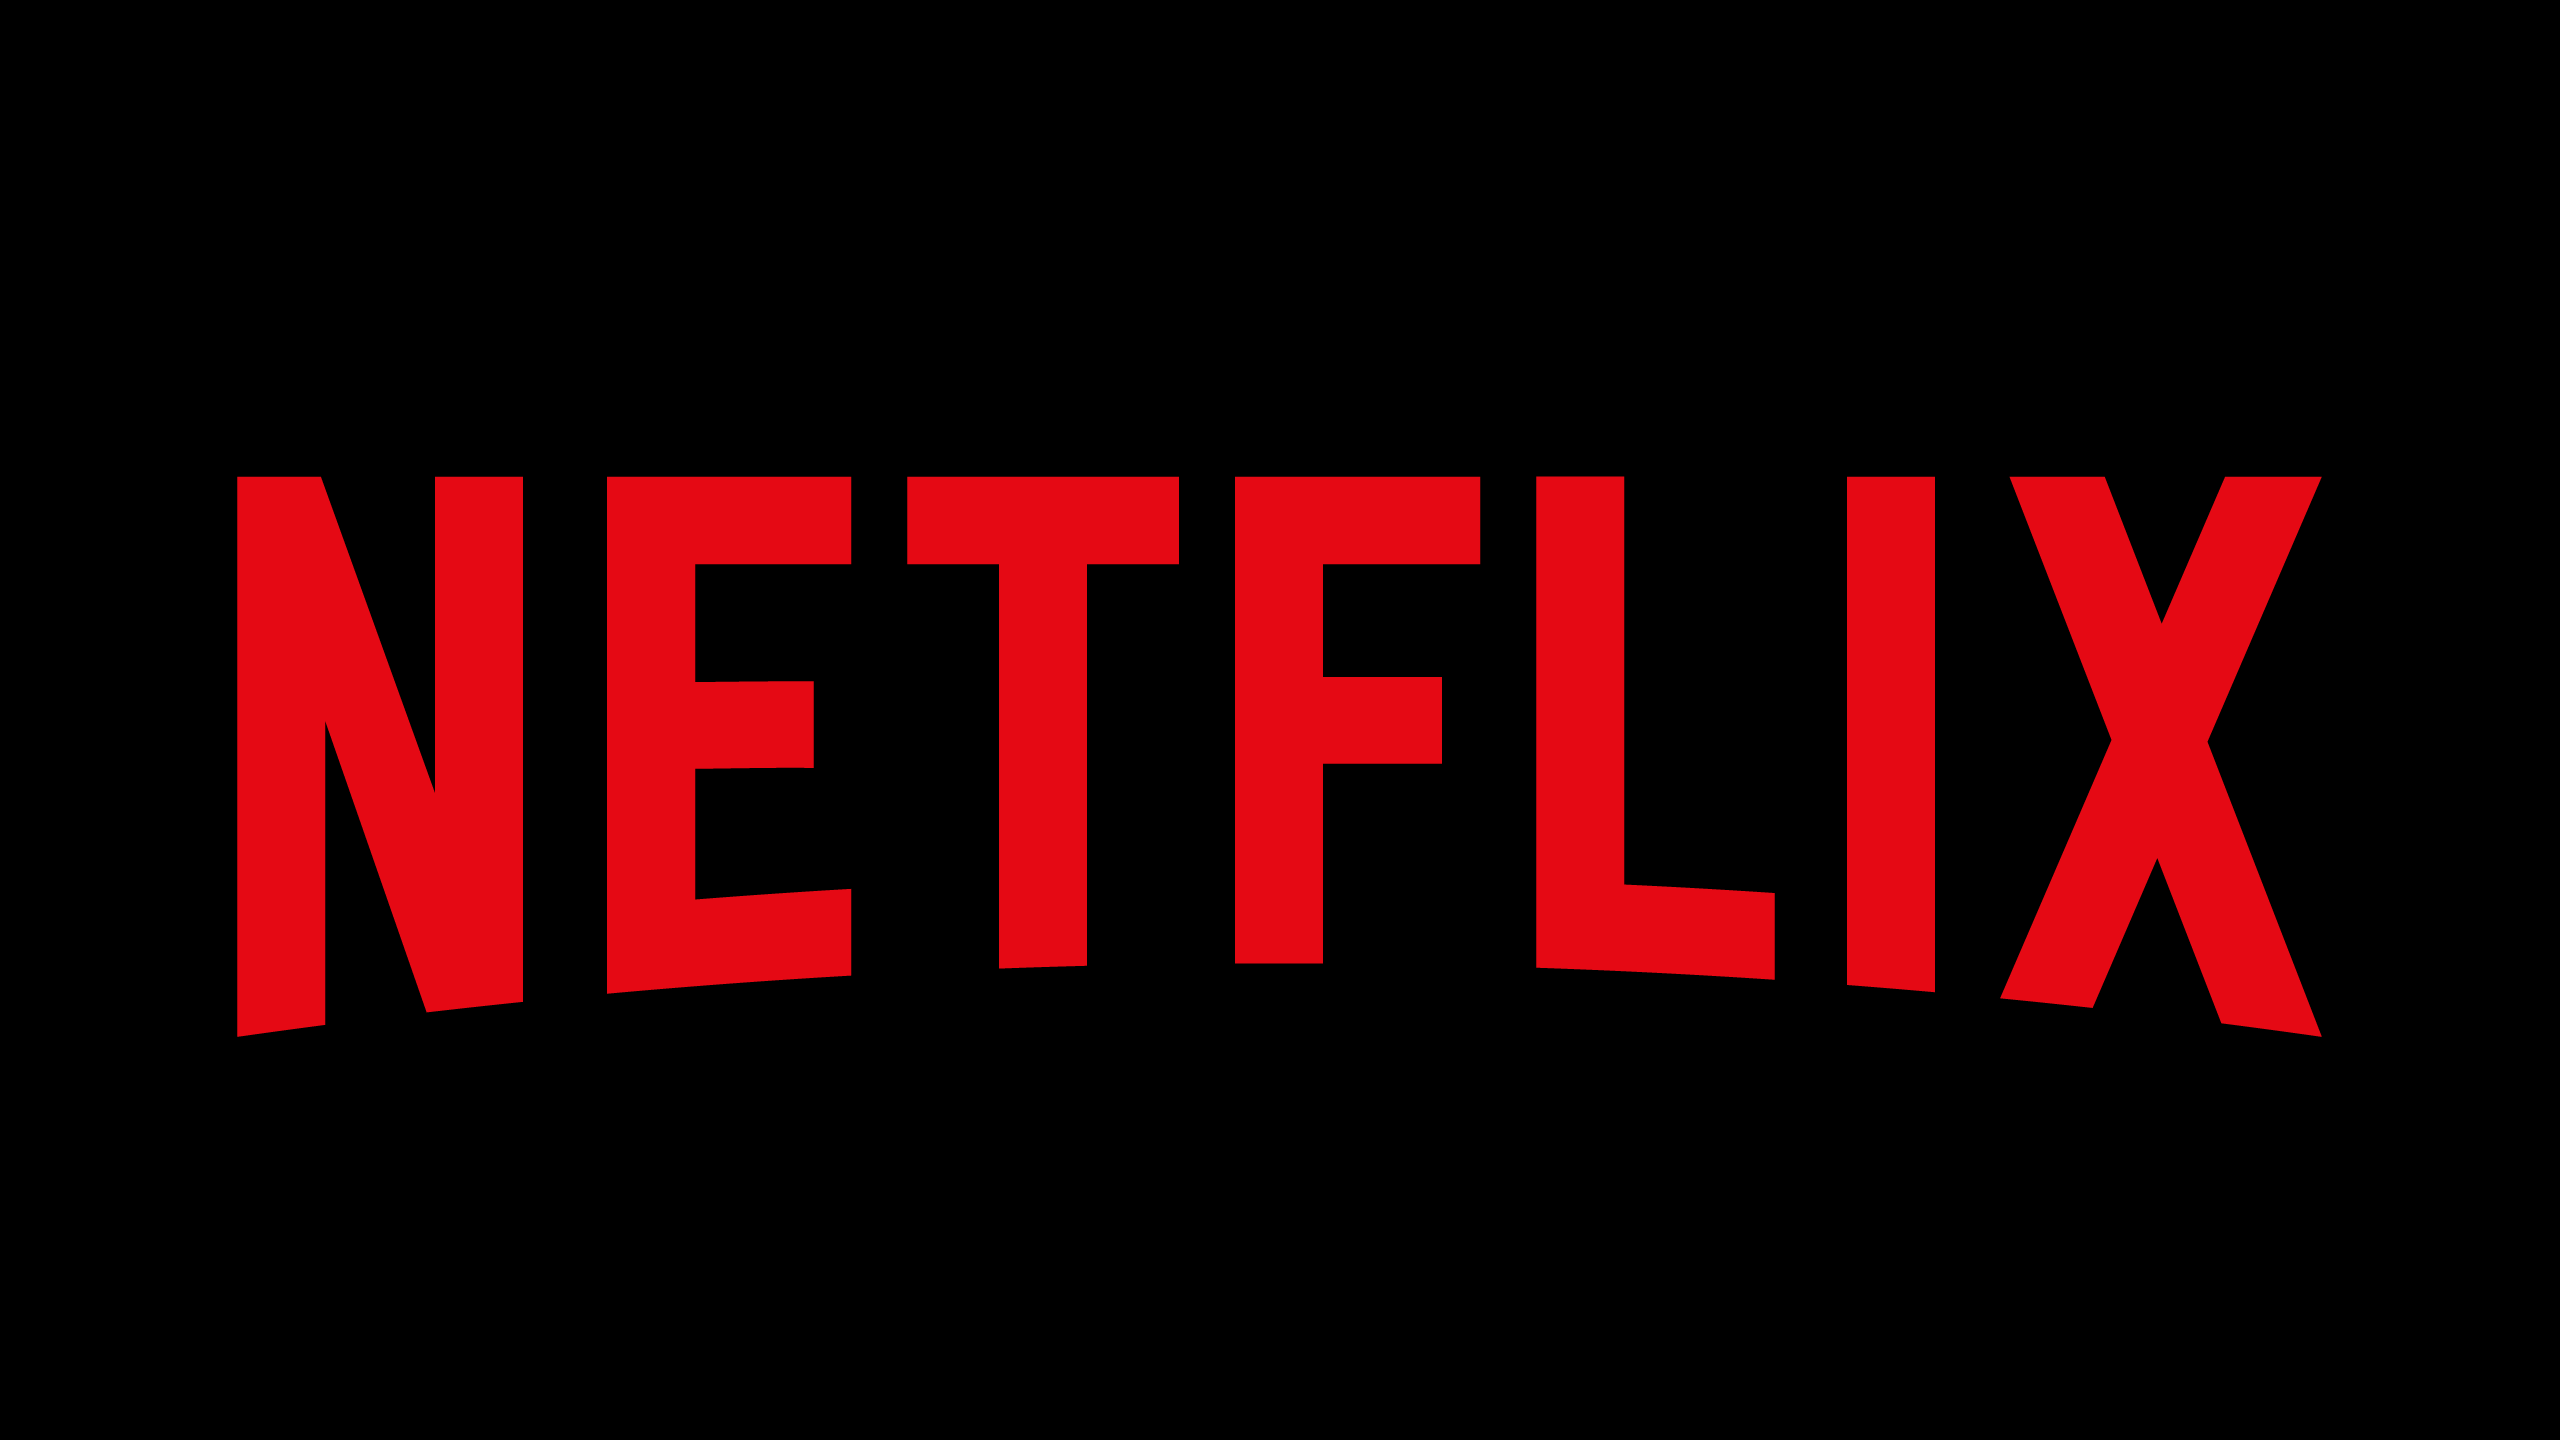

# **Project Summary -**

Write the summary here within 500-600 words.

Netflix, Inc. is a company from the United States that provides a service where you can watch videos whenever you want after subscribing. It's like a streaming service and is located in Los Gatos, California. It was started by Reed Hastings and Marc Randolph in 1997 in Scotts Valley, California. They have a collection of movies and TV shows that they show through agreements with others, as well as their own creations called Netflix Originals.

**In this project,i have done following things:-**

**1.** Exploratory Data Analysis.

**2.** Understanding what type content is available in different countries.

**3.** Is Netflix has increasingly focusing on TV rather than movies in recent years.

**4.** Clustering similar content by matching text-based features.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/MansiKaushik123/Netflix_Movies

# **Problem Statement**


**Write Problem Statement Here.**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install -U kaleido

In [ ]:
#loading the dataset.
netflix_movies1= pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


### Dataset First View

In [ ]:
# Dataset First Look
netflix_movies1.head()

In [ ]:
netflix_movies1.tail()

In [ ]:
netflix_movies1['title'].value_counts()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_movies1.index

In [ ]:
netflix_movies1.shape

In [ ]:
netflix_movies1.columns

### Dataset Information

In [ ]:
# Dataset Info
netflix_movies1.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_movies1.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_movies1.isnull().sum()


In [ ]:
#The count of missing data points in the Netflix Dataset.
netflix_movies1.isnull().sum().sum()

In [ ]:
# Visualizing the missing values
#Handling Null Values
netflix_movies1['cast'].fillna(value='No cast',inplace=True)
netflix_movies1['country'].fillna(value=netflix_movies1['country'].mode()[0],inplace=True)

In [ ]:
netflix_movies1.shape

### **What did you know about your dataset?**


**Answer Here**
This dataset holds details about different TV shows and movies offered on Netflix. It includes information such as where they were made, the year they were released, how they're rated, how long they are, what type of content they are (like action, drama, etc.), and a brief summary of each title. It consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_movies1.columns

In [ ]:
# Dataset Describe
netflix_movies1.describe(include='all')

### **Variables Description**

**Answer Here**
**Attribute Information**

**Show ID:** Unique code for each Movie or TV Show.

**Type:** Whether it's a Movie or TV Show.

**Title:** Name of the Movie or TV Show.

**Director:** Person who directed the Movie.

**Cast:** Actors who acted in the Movie or Show.

**Country:** Nation where the Movie or Show was made.

**Date Added:** Date it became available on Netflix.

**Release Year:** The actual year the Movie or Show was launched.

**Rating:** TV rating given to the Movie or Show.

**Duration:** Total time in minutes or number of seasons.

**Listed In:** Category or Genre.

**Description:** Brief summary of the plot.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(netflix_movies1.apply(lambda col: col.unique()))

In [ ]:
#Write  your code to prepare your dataset for analysis.
#Generate additional attributes to hold individual components of the date: date, day, month, and year.
netflix_movies1["date_added"] = pd.to_datetime(netflix_movies1['date_added'])  # First convert date_added to date time format.
netflix_movies1['day_added'] = netflix_movies1['date_added'].dt.day            # Compute day.
netflix_movies1['year_added'] = netflix_movies1['date_added'].dt.year          # Compute year.
netflix_movies1['month_added'] = netflix_movies1['date_added'].dt.month        # Compute month.


# **What all manipulations have you done and insights you found?**

**Answer Here.**

**Director Insights:** The data shows that there are some values missing in the "Director" column.

**Country Insights:** In the "Country" column, there are some values missing which we have replaced with zeros.

**Cast Insights:** The "Cast" column also has missing values that have been filled with the placeholder "No cast."

Date Added Insights: Similarly, the "Date Added" column has missing values.

**Duplicates Identified:** We've found some duplicated entries in the dataset, and the total sum of values in one column is zero.

**Finding Unique Values:** We've also looked at the unique values in each column, identifying distinct items across different columns.

Date Added Column Enhancement: Within the "Date Added" column, we've gone a step further by extracting more information such as the day, month, and year.

**Summary of Findings:**
 In conclusion, the dataset has gaps in the director, country, cast, and date added columns. We've filled in the cast column gaps with "No cast," and for the country column, zeros were used. We've detected and noted duplicated entries, including a column with a total sum of zero. Each column holds unique values. Moreover, we've enriched the date added column by breaking down information like the day, month, and year.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
labels = ['TV Show', 'Movie']
values = [netflix_movies1.type.value_counts()[1], netflix_movies1.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))


In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="jpeg", width=800, height=800, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The type of chart used in the code is a pie chart. I chose this chart because it's really good at showing how different categories of data are spread out. In this situation, the chart is used to show the different kinds of things people watch on Netflix. These things are split into two categories: "TV Show" and "Movie."

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**
Most of the content people watch on Netflix are TV shows, making up about 69.1%. On the other hand, movies make up a smaller part, accounting for around 30.9%.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The information shows that more people like watching TV shows than movies. About 69.1% of people prefer TV shows, while only 30.9% prefer movies. This hints that people generally prefer shorter content like TV shows instead of spending time on longer movies that might not be as interesting.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = netflix_movies1[netflix_movies1["type"] == "TV Show"]
movie = netflix_movies1[netflix_movies1["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()



In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1200, height=500, scale=1)
Image(img_bytes)


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The line graph is great for displaying how data changes over a continuous axis, like years. It helps you compare the number of TV shows and movies and how they change over time.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The data about how Netflix added TV shows and movies between 2008 and 2022 shows that there were not as many additions in the beginning. But, from 2016 onwards, there was a small rise in the number of new shows and movies. In 2019, there was a big jump in the number of movies added, while TV shows also increased but not as much as movies.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The new information suggests that Netflix is benefiting because more and more people want to watch TV shows and movies on their platform. This increase in popularity gives Netflix a chance to offer better content to its users, which will make users happier and more involved.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Create a DataFrame to store month values and counts
months_df = pd.DataFrame(netflix_movies1['month_added'].value_counts())

# Reset the index to create a "month" column
months_df.reset_index(inplace=True)

# Rename the columns to "month" and "count"
months_df.rename(columns={'index': 'month', 'month_added': 'count'}, inplace=True)

In [ ]:

fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

In [ ]:

from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=500, scale=1)
Image(img_bytes)


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The bar graph is good for showing and comparing information about different categories (like months) and how many times they appear. This graph helps us see how things were added over the months and if there are any noticeable patterns or trends.



##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Between October and December, there's a clear increase in the amount of new TV shows and movies available on Netflix. This is because these months include holidays like Halloween, Diwali, Thanksgiving, and Christmas. These celebrations often lead to more people staying indoors and looking for things to watch, so Netflix takes advantage of this by releasing a bunch of new content during this time.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

"The new information about more TV shows and movies on Netflix from October to December could help the business in a good way. Here's why:

Matching what people want during certain months
Keeping current customers interested
Getting new customers interested"

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_movies1, ax=ax,palette=['#FF0000' ,'#0000FF'])

##### **1. Why did you pick the specific chart?**

**Answer Here.**

By using a countplot, we can quickly observe and compare how often TV shows and movies are added each month.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Movies:

It seems that January, October, and December are the most popular months for Netflix to add new movies, in contrast to the rest of the months.

Television Shows:

For TV shows on Netflix, it's noticeable that October, November, and December stand out as the favored months for additions, unlike the other months.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Understanding which months are popular for movies and TV shows on Netflix could have a positive effect on the business. Here's the reason why:

1-Meeting Viewer Demand:

2-Capitalizing on Seasonal Trends:

3-Improved Competitiveness:

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#Analyzing the Variety of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d can be thought of as a code that helps find digits, while the + symbol in regex is like a code that helps find one or more of something.
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The Distplot works well for this analysis because it helps us see how many movies are in various duration ranges.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**


The typical duration of movies and TV shows that run for 50 to 150 minutes can change based on the particular content offered on Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

**Catering to Different Tastes:** Netflix offers a mix of short and long movies and shows, so people with different preferences and schedules can enjoy what they like.

**Keeping People Interested:** With shows and movies of different lengths, viewers can pick what suits their free time. This makes people watch more and for longer periods.

**More Types of Stories:** By having a variety of movie and show lengths, Netflix can have a wider collection of content. This includes different kinds of stories and ways of telling them.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The picture you're talking about is a countplot, which is like a bar chart. It helps us see how often different categories appear in a certain group. In this case, it's used to show how many times each TV show season appears, so we can understand how they're spread out.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Looking at the graph, we can see that most of the TV shows or web series in the data have just one season. The rest of the shows have at most two, three, four, or five seasons.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes ,Positive Impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
movie['originals'] = np.where(movie['release_year'] == movie['year_added'], 'Yes', 'No')
# "Imagine a chart in the shape of a pie that displays the proportions of two categories in movies: 'originals' and 'others'. This chart uses different slices to represent the percentage of each category."
fig, ax = plt.subplots(figsize=(5,5),facecolor="#660066")
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)
ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"blue", 'fontsize': 25}, colors =['red','#F5E9F5'])

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The pie chart is a good option for showing how different groups of things are divided up. For example, it's helpful for seeing how much of the whole is taken up by categories like "originals" and "others." It lets you easily compare the sizes of these categories compared to the whole picture.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

From all the movies you can watch on Netflix, about 30% of them were made by Netflix themselves. The other 70% are movies that came out before and were shown through various ways, but later got added to Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Certainly! Getting valuable information can really make a good difference for a business. When we look at how movies are spread out on Netflix, like figuring out how many are made by Netflix itself and how many aren't, Netflix can then make smart choices about what movies to get and make. This helps them improve their service and the shows they create.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
netflix_movies1['cast']

In [ ]:
#seperating actors from cast column
cast = netflix_movies1['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

In [ ]:
cast =cast[cast != 'No cast']

In [ ]:
cast.value_counts()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
# Make a list that shows TV show actors separately from the cast column.
top_TVshows_actor = netflix_movies1[netflix_movies1['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# Depicting the actor who has shown up in the greatest count of TV shows.
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = netflix_movies1[netflix_movies1['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# Creating a graph to show the actor who has been in the most movies."
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='Cyan')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The bars are laid out horizontally so you can read and compare the values more easily. Each bar's length shows how many TV shows or movies an actor was in. The chart has names and is split into two parts. One part is for TV shows and the other is for movies. This setup makes it clear which is which.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In TV shows, the actor who has appeared the most is Takahiro Sakurai. In the movies section, the actor with the most appearances is Anupam Kher.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Chart - 8 visualization code
top_10_Genre = netflix_movies1['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()



##### **1. Why did you pick the specific chart?**

**Answer Here.**

The round design of the pie chart lets you easily see how big each genre is by looking at the sizes of the sections. The labels and percentages shown outside the sections give more details and make it even easier to understand the chart.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Look at this chart. It shows the most popular types of shows and movies on Netflix. The top three are:

Documentaries: 14.4%

Stand-up Comedy: 13.9%

Drama and International Movies: 13.8%

These three types have the biggest numbers compared to the other types in the top 10 list.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**


Analyzing the different types of categories available on Netflix can provide valuable insights that could benefit the business in various ways:

**1- Selecting Content:** By paying attention to genres that are popular among viewers, Netflix can make sure to offer a wide variety of movies and shows that are interesting to its subscribers.

**2- Choosing What to Make or Buy:** This analysis can help Netflix figure out which genres are in high demand and have a dedicated audience. This way, they can make smarter decisions about what content to create or purchase, maximizing their investments.

**3- Personalized Suggestions:** Tailoring recommendations for individual users can enhance their overall enjoyment and nudge them to spend more time on the platform. This can enhance the user experience and encourage greater engagement.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Make a smaller group from the dataset containing only the information you need.
conuntryVSgenre = netflix_movies1[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  #Next, the function joins all the genre strings together into a single long string using the ", ".join()
  # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

In [ ]:
conuntryVSgenre

In [ ]:
## Create a list of the best ten countries."
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Make a blank dictionary to keep track of the values belonging to different genres in each country.y.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [ ]:
country_genre_count_df

In [ ]:
# Create a visual representation of the information shown in the data above.
df = country_genre_count_df

# Specify the colors that should be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# djust the design and information that appears when you move your cursor over something.
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()



##### **1. Why did you pick the specific chart?**

**Answer Here.**

This is great for displaying how various types of entertainment are spread out in many countries. Imagine each country as a pie chart, and the different entertainment types are the slices of the pie. The size of each slice shows how much of that type of entertainment a country has. This makes it simple to compare how entertainment types differ between countries, all in a really nice-looking way.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Action & Adventure as well as Dramas stand out as the most common types of movies and shows in nearly all countries. They are really popular since they have the highest levels in most nations. In the United States, there's a wide range of content available in many different genres. They excel particularly in Action & Adventure, Dramas, Comedies, and Documentaries.

In India, there's a big emphasis on Independent Movies and Dramas, but there aren't as many options in other genres.

The United Kingdom has a nice mix of Drama, International TV Shows, and Documentaries.

Australia provides a variety of content, with genres like Dramas, Comedies, International TV Shows, and Documentaries being quite evenly represented.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights can potentially help create a positive business impact in the following ways:

1-Targeted Content Strategy: By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

2-Market Expansion:The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

3-Content Localization: Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# number of unique values
netflix_movies1['release_year'].nunique()


In [ ]:
print(f'Oldest release year : {netflix_movies1.release_year.min()}')
print(f'Latest release year : {netflix_movies1.release_year.max()}')


In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(netflix_movies1['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_movies1, order=netflix_movies1['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

They picked a special type of chart that shows two things at once: a histogram and a grouped bar plot. This helps them look at one thing and two things together. The histogram shows how many movies were released each year. The grouped bar plot lets them compare the number of movies and TV shows in the top 15 years.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The histogram displays how the years when movies were released on Netflix are spread out. It's clear that movies started to appear on Netflix around 1980. The number of movies being added gradually increased, but it really picked up speed after the year 2000. The biggest bunch of releases happened between 2010 and 2020, showing that many movies and TV shows were added during that time.

Looking at the types of content (Movies or TV shows), the bar graph shows that the years 2017 and 2020 had the highest activity. During these years, a lot of movies, TV shows, and a mix of both were released on Netflix.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

the knowledge we acquire can make a good difference for businesses. When we grasp how different years' releases are spread out and spot patterns, companies can smartly choose what content to get, how to create it, and how to promote it.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
#Ratings
# number of unique values
netflix_movies1.rating.nunique()

**Variables Description- Rating**

**TV-Y:** This rating is for little kids aged 2-6. It's safe and might teach things.

**TV-Y7:*** For kids 7 and older. Can have a bit of action or scary stuff not good for younger kids.

**TV-Y7-FV:** Like TV-Y7, but with more action that's like pretend fighting.

**TV-G:** For everyone, even adults. Might have small bits of not-so-serious stuff.

**TV-PG:** Parents should watch with kids. Could have things kids might not understand or that parents want to explain.

**TV-14:** For kids 14 and older. Might have strong words, violence, or love stuff.

**TV-MA:** Just for grown-ups. Can have really strong violence, sexy stuff, or bad language.

**G:** For all, usually for young kids. Might be cartoons or family things.

**PG:** Parents should watch with kids, but not too bad.

**PG-13:** For teens 13 and up. Can have big action, words, or love things.

**R:** Just for adults. Might have serious violence, bad words, or nakedness.

**NC-17:** Only for grown-ups. Can have really sexy stuff or bad violence.

**NR:** No rating yet or not rated by anyone.

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=netflix_movies1, order=netflix_movies1['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_movies1, hue='type', order=netflix_movies1['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The selected pair of charts made by combining two count plots lets us analyze data in two ways: looking at individual variables and looking at how two variables relate. The first chart helps us understand the highest 10 ratings across all types of content. Meanwhile, the second chart allows us to compare ratings between movies and TV shows.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

TV-MA: This rating indicates that the content is meant for grown-up viewers only. It might have scenes of strong violence, detailed sexual content, or intense language.

When it comes to ratings, the most widespread one is TV-MA, which is used for both movies and TV shows.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Knowing that the TV-MA rating is the most frequent rating for both movies and TV shows can help shape plans for what to show, who to aim for, what to schedule, and how to create a variety of content. This can result in better business results, like more people watching and happier customers.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
# Replace the null values in director.
netflix_movies1['director']=netflix_movies1['director'].fillna('')

In [ ]:
 #Create a DataFrame with director counts
directors_list = netflix_movies1.director.value_counts().reset_index().head(15)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

#Make a bar graph using Plotly.
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

#Create a collection of 25 different color codes that are distinct using the seaborn library.
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the plot
fig.show()


In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

In [ ]:
directors_list

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The chart that was picked effectively shows the information in a way that's easy to understand and looks nice. This helps people quickly see which directors have done the most work on Netflix.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**


Raúl Campos and Jan Suter are the directors with the most Movies and TV shows available on Netflix. They have created a larger number of content compared to other directors

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
#Categorizing the Ratings into Groups
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_movies1['target_ages'] = netflix_movies1['rating'].replace(ratings)



In [ ]:
# Preparing data for heatmap
netflix_movies1['count'] = 1
data = netflix_movies1.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = netflix_movies1.loc[netflix_movies1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()



##### **1. Why did you pick the specific chart?**

**Answer Here.**

A heatmap works well when you want to show how two groups, like countries and age groups, are connected. It's great for clearly showing patterns, trends, and comparisons between these groups.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In short, the data we have shows that people's interest in the topic differs between countries and age groups. Here's what we can conclude:

Looking at the countries, Spain stands out with the most adults, about 84%, being interested in the topic. This suggests a strong interest among Spanish adults.

**1.France-** France comes next, with 68% of adults showing interest. This indicates a significant engagement with the topic among French adults.

**2.India-** In India, the highest percentage of interest comes from teenagers, with 57% showing interest. This points to a notable interest among young people in India.

**3.United Kingdom -**The United Kingdom also has a decent level of interest among adults, with 51% expressing interest..

**4.Mexico-** Mexico also demonstrates a high level of interest, with 77% of adults being interested in the topic.

**5.South Korea , United States-**Both South Korea and the United States have 47% of adults interested, showing a moderate level of engagement.

**6.Japan-** Japan shows moderate interest among both adults and teenagers, with 36% of each group expressing interest.

**7.Canada-** Canada has the lowest interest percentage among the listed countries, with 45% of adults showing interest.

**To sum up, these conclusions emphasize the different levels of interest in the topic among various countries and age groups. The data suggests that Spain, France, India, and Mexico have higher interest levels among adults, whereas Canada's interest is relatively lower compared to the other countries.**

# **Will the gained insights help creating a positive business impact?**

**Answer Here**

The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

#### Chart - 15 - **Correlation Heatmap**

In [ ]:
netflix_movies1['count'] = 1
data1 = netflix_movies1.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

In [ ]:
data1

In [ ]:
df_heatmap1 = netflix_movies1.loc[netflix_movies1['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()



##### **1. Why did you pick the specific chart?**





**Answer Here.**

Using a heatmap works well in this situation because it lets me show the information using different colors. How dark or light a color is shows how often certain types of movies appear in different age groups.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Most adults, about 89%, enjoy stand-up comedy the most out of all the types of entertainment.

Many people, around 82%, like to watch movies that are made for both children and families, as well as comedies.

Shows made for older kids and adults are the main focus, and they are liked by about 66% to 53% of the audience.

# **Chart - 16**

In [ ]:
country_count=netflix_movies1['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

In [ ]:
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()

**1.Why did you pick the specific chart?**

**Answer Here.**

Funnel charts are like visual tools used to show how data decreases step by step in different groups or stages. In this situation, the chart helps you see the number of movies in the top 10 countries, and it's designed to show how the count gets smaller as you go from the highest to the lowest.

**2.What is/are the insight(s) found from the chart?**

**Answer Here.**

The United States makes the most movies, a whopping 3062 of them. This shows that the U.S. is really powerful in the movie world. India comes next, making 923 movies. This means India is also really important in the worldwide movies and TV shows business.

**3.Will the gained insights help creating a positive business impact?**

**Answer Here.**

Yes, the information we've learned can make a good difference for businesses in a few ways:

1.Finding the Right People: Businesses that need talented people for jobs like making movies, writing, acting, or technical work can use this information to find and hire the right individuals.

2.Reaching More Places: The insights show us which countries make a lot of movies, like the United States and India. This helps businesses know where to expand, sell their movies, advertise, and work with others.

## ***5. Hypothesis Testing***

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies1.copy()
#head of df_hypothesis
netflix_hypothesis.head()

In [ ]:
#"Finding movies by filtering from the 'Type_of_show' column."
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]


In [ ]:
#Organizing items based on their ratings and categorizing them accordingly.
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()


In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

In [ ]:
#Group the data based on the duration and target ages.
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


In [ ]:
#Grouping values in variables A and B
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#Calculating the average and the spread (how much the values vary) for both the "kids" and "older kids" groups.
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

**Answer Here.**


Since the t-value isn't within the expected range, we can't accept the null hypothesis.

So, any movies that last longer than 90 minutes are considered.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Merging all the characteristics used for clustering into one single column.
netflix_movies1['clustering'] = (netflix_movies1['director'] + ' ' + netflix_movies1['cast'] +' ' +
                                 netflix_movies1['country'] +' ' + netflix_movies1['listed_in'] +
                                 ' ' + netflix_movies1['description'])


In [ ]:
netflix_movies1['clustering'][25]

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)



In [ ]:
netflix_movies1['Clean_Text'] = netflix_movies1['clustering'].apply(transform_text)


In [ ]:
netflix_movies1["Clean_Text"][50]

#### 8. Text Normalization

**TF-IDF is a method that combines two measures to help understand the significance of words in documents.**

**Term Frequency (TF): **This shows how often a word appears in a document. If a word shows up a lot, it's likely important for that document. The calculation goes like this:

TF(t, d) = (Number of times the word 't' appears in document 'd') / (Total number of words in document 'd')


**Inverse Document Frequency (IDF):** This reveals how important a word is across all documents. Words that are rare across all documents get more importance. The formula for this is:

IDF(t) = log_e(Total number of documents / Number of documents containing the word 't')

In [ ]:
bag_of_words = netflix_movies1.Clean_Text

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

In [ ]:
t_vectorizer.get_feature_names_out()

### 7. Dimesionality Reduction

##### **Do you think that dimensionality reduction is needed? Explain Why?**

**Answer Here.**

PCA is a method used to make datasets simpler by reducing their complexity. It figures out the main directions (principal components) in which the data changes the most. These components are arranged based on how much of the data's variety they account for.

In [ ]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

##### **Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**

**Answer Here.**

PCA is like a magic tool for data. It takes all the important stuff from a bunch of information and makes it simpler to understand. It changes the information into a new form that doesn't have any connections between the parts. These new parts are like special ingredients that show the biggest differences in the information.

In [ ]:
#let's graph the amount of variation we can understand against the number of components we include. This will help us figure out how many components we should take into account.
#explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()


**The story helps you figure out how many parts to use to make data simpler. You can pick the number of parts where the total explained information becomes good enough, like 95%. The spot where the line on the graph meets or gets really close to the chosen amount can help you decide how many parts to use for your study.**

In [ ]:
# Import the necessary libraries
from sklearn.decomposition import PCA
#Make a PCA instance and choose the wanted proportion of explained variance.
pca_tuned = PCA(n_components=0.95)
# Train the PCA model using the input data, X, after converting it into a solid numerical array.
pca_tuned.fit(X.toarray())
# Convert the given input data, X, into a version with fewer dimensions.
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


In [ ]:
X_transformed

## ***7. ML Model Implementation***

In [ ]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()


**The graph will also show the point where there's a bend, like the elbow, which suggests the best number of groups according to the chosen measurement. We're using a graph with a bend that suggests 5 clusters are ideal.**

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data



In [ ]:
silhouette_score_analysis(15)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Make a picture with a certain width and height, and make it clear and detailed.
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Go through various amounts of clusters one by one.
for i in range(1, 22):
    # Make a KMeans model using the default settings.
    model = KMeans(random_state=0)

    #Start the KMeans algorithm with particular settings.
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Add cluster values to the dateframe.
netflix_movies1['cluster_number'] = kmeans.labels_

In [ ]:
netflix_movies1.head(1)

In [ ]:
# Determine how many movies or TV shows are in each group.
cluster_content_count = netflix_movies1['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)

In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_movies1[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()




In [ ]:
word_count(9)

**Cluster 9 within a dataset has 232 words in total. The words that appear most often in this cluster are**:

**Type**: Movies and TV Shows

**Title**: Broadway, Remastered, Christmas, Friends Orchestra

**Country**: United Kingdom, Argentina, United States, India

**Rating**: TV-MA, PG-TV

**Categories**: Dramas International, Musical Dramas, Musical Documentaries, Comedies International

**Description**: Documentary, Music, One, Bad, Tour, Love.

In [ ]:
word_count(11)

**Cluster 11 in the dataset holds a collection of 410 words. The words that appear most often in this cluster are**:

**Category**: Movies & TV Shows

**Titles**: Special, America, Time, Live, Comedy, Netflix Alive, Martin

**Countries**: United States, Brazil, Mexico, Italy

**Ratings**: TV-MA, TV-PG

**Categories**: TV Comedies, Comedy Stand, Talk Shows

**Descriptions**: Comedy performed on stage, Humorous, Experiencing life, Live entertainment, Sharing stories.

**Descriptions**: Documentary, Music, Singular, Negative, Touring, Love.

# **Recommender system**

**A recommender system is like a helper that suggests things you might like**. It looks at what you've shown interest in before, what you like, and what you've done in the past. I**t's used in places like online stores, streaming sites, and social media to give you suggestions that you'll probably enjoy.**

There's one way it works called **content-based filtering**. This means it suggests things that are similar to what you've already liked. It looks at the details of the stuff you've enjoyed and suggests more things like that. For example, if you really like action movies, it will recommend other action movies that have similar actors, storylines, or themes.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_movies1['description'] = netflix_movies1['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_movies1['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

In [ ]:
indices = pd.Series(netflix_movies1.index, index=netflix_movies1['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_movies1['title'].iloc[movie_indices]

In [ ]:
netflix_movies1['title'][1:70]

In [ ]:
get_recommendations( '14 Cameras',cosine_sim)

# **Conclusion**

Write the conclusion here.

1- It's interesting to observe that most of what you can watch on Netflix are movies. However, in recent times, the platform has been paying more attention to TV shows.

2- These shows mostly come out either towards the start or the end of the year.

3- Among all the countries contributing content to Netflix, the United States and India stand out in the top five. Additionally, out of the ten actors who have the most content, six are from India.

4- When we look at content ratings, TV-MA is the leader, showing that mature content is quite popular on Netflix.

5- The number "k" that worked best for categorizing the data was 15. This number was used to put the content into ten different groups.

6- With this information, a recommender system was made based on the content itself. It used cosine similarity to suggest Movies and TV shows for you to watch.







# **Future Work**

Combining this dataset with outside information like IMDB ratings, grouping of books, and categorizing plant types could uncover many fascinating findings.

By adding more data, we could create a better recommendation system that gives users even better suggestions. This improved system could be put on the internet for lots of people to use.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***